# `003-pets-dataloader`

Task: create data loaders for the Pets dataset using the mid-level `DataBlocks` API

## Setup

In [1]:
# setup fastai if needed
try: import fastbook
except ImportError: import subprocess; subprocess.run(['pip','install','-Uq','fastbook'])

# Import fastai code.
from fastai.vision.all import *

# Set a seed for reproducibility.
set_seed(12345, reproducible=True)

Load the data.

In [2]:
path = untar_data(URLs.PETS) / "images"

Sort the image filenames so the ordering is consistent across platforms and runs.

In [3]:
image_files = sorted(get_image_files(path))

## Task

Create the cat-vs-dog classifier of notebook `000`, but use the mid-level `DataBlocks` API instead of the high-level `ImageDataLoaders`. To do so:

1. Create a `splitter` object that will randomly split the images into a training set and a 20% validation set. Use a random seed of 42 to make results reproducible.
2. Show the first few indices from the train and valid sets that result from applying `splitter` to the `image_files` declared above.
3. Write a `get_y` function that takes an image file `Path` object and returns `cat` or `dog` accordingly.
4. Test your `get_y` function by applying it to the first image in the training set. Load the image file (using `PILImage.create`) and check that the label is correct.
5. Create a `DataBlock` using the standard `ImageBlock` and `CategoryBlock`, your `get_y` function, and the `splitter`. Have it transform each item by resizing it to 224 pixels square.
6. Create a `DataLoaders` by applying your `DataBlock` to the `image_files`.
7. Test your `DataLoaders` by showing a batch of images from the validation set.

## Solution

### Problem 1-2

In [4]:
# Create splitter
splitter = RandomSplitter(valid_pct=0.2, seed=42)

# Split data
split_data = splitter(image_files)

# Show first few indices from training set
split_data

((#5912) [5643,5317,5806,3460,613,5456,2968,3741,10,4908...],
 (#1478) [4512,4290,5770,706,2200,4320,6450,501,1290,6435...])

### Probem 3

In [5]:
def get_y(path):
    name = str(path).split('/')[-1]
    return "cat" if name[0].isupper() else "dog"

### Problem 4

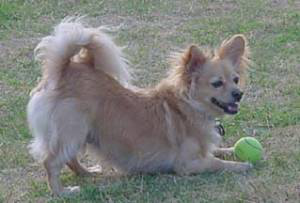

In [6]:
# Load and display first image in training set
train, valid = split_data
test_path = image_files[train[0]]
test_img = PILImage.create(test_path)
test_img

In [7]:
# Test label function
get_y(test_path)

'dog'

### Problem 5

In [8]:
cats_and_dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=splitter,
    get_y=get_y,
    item_tfms=Resize(224)
)

### Problem 6

In [9]:
dls = cats_and_dogs.dataloaders(path)

### Problem 7

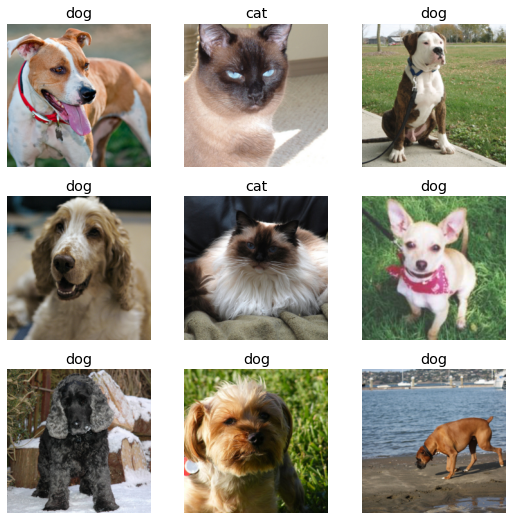

In [10]:
dls.valid.show_batch(max_n=9, nrows=3)

## Analysis

*Answer these questions by inspecting the data loaders you just created. Check that your answers matches the answers you got in notebook `000`.*

**How many images were in the training set? Validation set?**

In [11]:
dls.train.n, dls.valid.n

(5912, 1478)

Training set: 5912; validation set: 1478

***How many dogs were there in the dataset? How many cats?***

In [12]:
labels = [get_y(x) for x in image_files]
Counter(labels)

Counter({'cat': 2400, 'dog': 4990})

4990 dogs and 2400 cats

## Extension

**Use the `.summary` method of your `DataBlock` to show the pipeline of operations that is performed to turn one of the `image_files` into a batch.** (Note that `summary` does *not* return any `DataLoaders`.)

In [13]:
cats_and_dogs.summary(path)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /scratch/cs344/data/oxford-iiit-pet/images/japanese_chin_92.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /scratch/cs344/data/oxford-iiit-pet/images/japanese_chin_92.jpg
    applying get_y gives
      dog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(1))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipelin

**Call the `.one_batch` method on your fully-constructed validation-set `DataLoader` (hint: `.valid`). Notice that the batch has two parts. Describe briefly what happened to the image file(s) to make each part.**

In [14]:
dls.valid.one_batch()

(TensorImage([[[[0.3843, 0.3804, 0.3843,  ..., 0.6000, 0.5922, 0.5882],
           [0.3882, 0.3882, 0.3843,  ..., 0.6039, 0.5961, 0.5922],
           [0.3922, 0.3922, 0.3961,  ..., 0.6118, 0.6000, 0.5922],
           ...,
           [0.2275, 0.2235, 0.2196,  ..., 0.1176, 0.1294, 0.1333],
           [0.2078, 0.2078, 0.2039,  ..., 0.1137, 0.1373, 0.1451],
           [0.2039, 0.1961, 0.1922,  ..., 0.1216, 0.1412, 0.1529]],
 
          [[0.4314, 0.4275, 0.4235,  ..., 0.5294, 0.5216, 0.5255],
           [0.4314, 0.4314, 0.4235,  ..., 0.5333, 0.5255, 0.5255],
           [0.4314, 0.4314, 0.4353,  ..., 0.5333, 0.5294, 0.5255],
           ...,
           [0.3529, 0.3529, 0.3529,  ..., 0.2275, 0.2353, 0.2392],
           [0.3373, 0.3373, 0.3333,  ..., 0.2118, 0.2314, 0.2353],
           [0.3373, 0.3255, 0.3216,  ..., 0.2039, 0.2196, 0.2275]],
 
          [[0.3922, 0.3882, 0.3922,  ..., 0.4510, 0.4431, 0.4510],
           [0.3961, 0.3922, 0.3922,  ..., 0.4549, 0.4471, 0.4510],
           [0.4000,

In [15]:
dls.valid.vocab

['cat', 'dog']

The batch's two parts are the images and the image labels. The first part is a list of the images, represented as pixels. The second part is a tensor of 0s and 1s; each value represents the label for the image in the corresponding index. The 0s represent the label "cat", and the 1s represent the label "dog".